# pytorch基础
下载安装：https://pytorch.org/get-started/locally/



# 张量


**简介**

几何代数中定义的张量是基于向量和矩阵的推广，比如我们可以将标量视为零阶张量，矢量可以视为一阶张量，矩阵就是二阶张量。



In [5]:
import torch

##  scalar:0维张量/标量 标量是一个数字

In [3]:
x = torch.tensor(42.)
x

tensor(42.)

In [4]:
x.dim()#维度

0

In [5]:
x.item()#返回value

42.0

In [6]:
2 * x

tensor(84.)

##  vector:1维张量/向量  1维张量称为“向量”。

In [7]:
v = torch.tensor([1.5, -0.5, 3.0])
v

tensor([ 1.5000, -0.5000,  3.0000])

In [8]:
v.dim()

1

In [9]:
v.size()

torch.Size([3])

In [10]:
v.shape

torch.Size([3])

## matrix：  2维张量称为矩阵

In [11]:
M = torch.tensor([[1., 2.], [3., 4.]])
M

tensor([[1., 2.],
        [3., 4.]])

In [12]:
M.mean()#求均值

tensor(2.5000)

乘法

In [13]:
M.matmul(M)

tensor([[ 7., 10.],
        [15., 22.]])

In [14]:
torch.tensor([1., 0.]).matmul(M)

tensor([1., 2.])

In [15]:
M * M

tensor([[ 1.,  4.],
        [ 9., 16.]])

In [16]:
torch.tensor([1., 2.]).matmul(M)

tensor([ 7., 10.])

加法

In [17]:
x = torch.rand(4, 3) 
x

tensor([[0.5899, 0.2004, 0.6774],
        [0.1422, 0.5310, 0.1642],
        [0.4733, 0.5551, 0.9600],
        [0.9891, 0.8923, 0.7183]])

In [18]:
y = torch.rand(4, 3) 
y

tensor([[0.1474, 0.9871, 0.5906],
        [0.1206, 0.2521, 0.6360],
        [0.6358, 0.2870, 0.5741],
        [0.8392, 0.5284, 0.2441]])

In [19]:
x + y

tensor([[0.7374, 1.1875, 1.2680],
        [0.2628, 0.7830, 0.8002],
        [1.1091, 0.8421, 1.5342],
        [1.8283, 1.4208, 0.9624]])

In [20]:
torch.add(x, y)

tensor([[0.7374, 1.1875, 1.2680],
        [0.2628, 0.7830, 0.8002],
        [1.1091, 0.8421, 1.5342],
        [1.8283, 1.4208, 0.9624]])

In [21]:
# 方式3 提供一个输出 tensor 作为参数
result = torch.empty(4, 3) 
torch.add(x, y, out=result) 
print(result)

tensor([[0.7374, 1.1875, 1.2680],
        [0.2628, 0.7830, 0.8002],
        [1.1091, 0.8421, 1.5342],
        [1.8283, 1.4208, 0.9624]])


In [22]:
# 方式4 in-place
y.add_(x) 
print(y)

tensor([[0.7374, 1.1875, 1.2680],
        [0.2628, 0.7830, 0.8002],
        [1.1091, 0.8421, 1.5342],
        [1.8283, 1.4208, 0.9624]])


##  3-dimensional tensor： 公用数据存储在张量 时间序列数据 股价 文本数据 彩色图片(**RGB**)

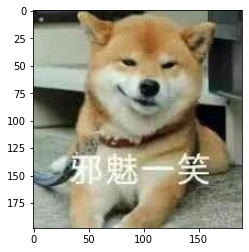

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

pil_im = Image.open('01.jpg')

plt.imshow(pil_im)
plt.show()

对于计算机来说，图像是一个由数字组成的巨大的三维数组。在这个表情包的例子中，图像的大小是高198像素，宽190像素，有3个颜色通道，分别是红、绿和蓝（简称RGB）。如此，该图像就包含了198×190×3=112860个数字，每个数字都是处于范围0～255之间的整型，其中0表示黑，255表示白。

In [3]:
np_im = np.array(pil_im)
print(np_im.shape,np_im.dtype)
np_im

(198, 190, 3) uint8


array([[[ 30,  29,  35],
        [ 30,  29,  35],
        [ 36,  35,  41],
        ...,
        [ 27,  31,  30],
        [ 30,  32,  31],
        [ 40,  42,  41]],

       [[ 32,  31,  37],
        [ 28,  27,  33],
        [ 28,  27,  33],
        ...,
        [ 27,  31,  30],
        [ 30,  32,  31],
        [ 40,  42,  41]],

       [[ 31,  30,  35],
        [ 25,  24,  29],
        [ 22,  21,  26],
        ...,
        [ 27,  31,  30],
        [ 30,  32,  31],
        [ 40,  42,  41]],

       ...,

       [[173, 180, 172],
        [174, 181, 173],
        [175, 182, 174],
        ...,
        [158, 159, 153],
        [159, 160, 155],
        [160, 161, 156]],

       [[161, 168, 160],
        [164, 171, 163],
        [168, 175, 167],
        ...,
        [162, 163, 157],
        [164, 165, 160],
        [164, 165, 160]],

       [[156, 163, 155],
        [160, 167, 159],
        [165, 172, 164],
        ...,
        [165, 166, 160],
        [166, 167, 162],
        [167, 168, 163]]

转换为tensor格式

In [6]:
tensor_pil = torch.from_numpy(np.transpose(np_im, (2, 0, 1)))
tensor_pil

tensor([[[ 30,  30,  36,  ...,  27,  30,  40],
         [ 32,  28,  28,  ...,  27,  30,  40],
         [ 31,  25,  22,  ...,  27,  30,  40],
         ...,
         [173, 174, 175,  ..., 158, 159, 160],
         [161, 164, 168,  ..., 162, 164, 164],
         [156, 160, 165,  ..., 165, 166, 167]],

        [[ 29,  29,  35,  ...,  31,  32,  42],
         [ 31,  27,  27,  ...,  31,  32,  42],
         [ 30,  24,  21,  ...,  31,  32,  42],
         ...,
         [180, 181, 182,  ..., 159, 160, 161],
         [168, 171, 175,  ..., 163, 165, 165],
         [163, 167, 172,  ..., 166, 167, 168]],

        [[ 35,  35,  41,  ...,  30,  31,  41],
         [ 37,  33,  33,  ...,  30,  31,  41],
         [ 35,  29,  26,  ...,  30,  31,  41],
         ...,
         [172, 173, 174,  ..., 153, 155, 156],
         [160, 163, 167,  ..., 157, 160, 160],
         [155, 159, 164,  ..., 160, 162, 163]]], dtype=torch.uint8)

In [7]:
tensor_pil.dim()

3

In [8]:
tensor_pil.size()

torch.Size([3, 198, 190])

张量是现代机器学习的基础。它的核心是一个数据容器，多数情况下，它包含数字，有时候它也包含字符串，但这种情况比较少。因此可以把它想象成一个数字的水桶。

这里有一些存储在各种类型张量的公用数据集类型：

- **3维=时间序列**
- **4维=图像**
- **5维=视频**

例子：一个图像可以用三个字段表示：

(width, height, channel) = 3D

但是，在机器学习工作中，我们经常要处理不止一张图片或一篇文档——我们要处理一个集合。我们可能有10,000张郁金香的图片，这意味着，我们将用到4D张量：

(sample_size, width, height, channel) = 4D

在PyTorch中， torch.Tensor 是存储和变换数据的主要工具。如果你之前用过NumPy，你会发现 Tensor 和NumPy的多维数组非常类似。然而，Tensor 提供GPU计算和自动求梯度等更多功能，这些使 Tensor 这一数据类型更加适合深度学习。



![Scalar, vector, matrix, tensor - a drawing by Tai-Danae Bradley](https://uploads-ssl.webflow.com/5b1d427ae0c922e912eda447/5cd99a73f8ce4494ad86852e_arraychart.jpg)

## 基本操作

查看文档

In [ ]:
?torch.tensor

### 创建tensor

常见的构造Tensor的函数

In [9]:
a = torch.rand(2, 3) #构造一个随机初始化的矩阵
a

tensor([[0.0742, 0.8908, 0.8623],
        [0.9959, 0.6204, 0.8050]])

In [10]:
b = torch.randn(4, 2) #随机数服从正态分布
b

tensor([[ 0.9811, -1.7242],
        [ 1.3240, -0.0106],
        [-0.6374,  1.0228],
        [ 1.3751, -0.5401]])

In [11]:
c = torch.ones(2, 3) #全1
c

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [12]:
d = torch.zeros(2, 3) #全0
d

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [13]:
e = torch.arange(0, 10, 2) #从0到10，步长为2
e

tensor([0, 2, 4, 6, 8])

In [14]:
f = torch.linspace(1,10,5) #从1到10，均分为5个
f

tensor([ 1.0000,  3.2500,  5.5000,  7.7500, 10.0000])

In [15]:
g = torch.eye(3,2) #对角为1，其余为0
g

tensor([[1., 0.],
        [0., 1.],
        [0., 0.]])

In [16]:
h = torch.randperm(10) #随机排列
h

tensor([8, 5, 2, 4, 6, 1, 7, 3, 0, 9])

In [17]:
i = torch.tensor([5.5, 3]) #直接使用数据，构造一个张量
i

tensor([5.5000, 3.0000])

基于已经存在的 tensor，创建一个 tensor ：

In [18]:
j = i.new_ones(4, 3, dtype=torch.double) # 创建一个新的tensor，返回的tensor默认具有相同的 torch.dtype和torch.device
# 也可以像之前的写法 x = torch.ones(4, 3, dtype=torch.double)
print(j)
k = torch.randn_like(j, dtype=torch.float)
# 重置数据类型
print(k)
# 结果会有一样的size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 1.1646,  0.3676,  0.4057],
        [ 0.5439, -0.8238, -1.7282],
        [ 2.7521, -1.1723,  1.2022],
        [ 1.4722,  0.0546, -0.8418]])


empty创建一个未被初始化数值的tensor,tensor的大小是由size确定

In [19]:
l=torch.empty(size=[2,4],out=k)
l

tensor([[ 1.1646,  0.3676,  0.4057,  0.5439],
        [-0.8238, -1.7282,  2.7521, -1.1723]])

创建tensor，用dtype指定类型。注意类型要匹配

In [20]:
m = torch.tensor(1.0, dtype=torch.float)
n = torch.tensor(1, dtype=torch.long)
o = torch.tensor(1.0, dtype=torch.int8)
print(m, n, o)

tensor(1.) tensor(1) tensor(1, dtype=torch.int8)


<ipython-input-20-1a760faca769>:3: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  o = torch.tensor(1.0, dtype=torch.int8)


使用指定类型函数随机初始化指定大小的tensor

In [21]:
p = torch.FloatTensor(2,3)
q = torch.IntTensor(2)
r = torch.IntTensor([1,2,3,4])  #对于python已经定义好的数据结构可以直接转换
print(p, '\n', q, '\n', r)

tensor([[0., 0., 0.],
        [0., 0., 0.]]) 
 tensor([-940981984,      32764], dtype=torch.int32) 
 tensor([1, 2, 3, 4], dtype=torch.int32)


tensor和numpy array之间的相互转换

In [22]:
s = np.array([[1,2,3],[4,5,6]])
print(s)
t = torch.tensor(s)
print(t)
u = torch.from_numpy(s)
print(u)
v = u.numpy()
print(v)

[[1 2 3]
 [4 5 6]]
tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)
tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)
[[1 2 3]
 [4 5 6]]


扩展&压缩tensor的维度：squeeze

In [23]:
w = u.unsqueeze(1)#unsqueeze:扩充数据维度，在0起的指定位置N加上维数为一的维度
print(w)
print(w.shape,'\n')

x = w.squeeze(0)
print(x)
print(x.shape,'\n')

y = w.squeeze(1)#squeeze:维度压缩，在0起的指定位置，去掉维数为1的的维度
print(y)
print(y.shape)

tensor([[[1, 2, 3]],

        [[4, 5, 6]]], dtype=torch.int32)
torch.Size([2, 1, 3]) 

tensor([[[1, 2, 3]],

        [[4, 5, 6]]], dtype=torch.int32)
torch.Size([2, 1, 3]) 

tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)
torch.Size([2, 3])


索引操作：（类似于numpy）

In [24]:
print(u)
z = u[0,:]
z += 1
print(z)
print(u[0, :]) # 源tensor也被改了了

tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)
tensor([2, 3, 4], dtype=torch.int32)
tensor([2, 3, 4], dtype=torch.int32)


view操作可以改变矩阵维度

In [25]:
x = torch.randn(2, 4)
y = x.view(8)
z = x.view(-1, 2) # -1是指这一维的维数由其他维度决定
print(x,'\n',y,'\n',z,'\n')
print(x.size(), y.size(), z.size(),'\n')

#注意 view() 返回的新tensor与源tensor共享内存(其实是同一个tensor)，也即更改其中的一个，另外一个也会跟着改变。(顾名思义，view仅仅是改变了对这个张量的观察⻆度)
x += 1
print(x,'\n')
print(y) # 也加了1

tensor([[ 0.5685,  0.0500,  1.6159,  1.3776],
        [ 1.4165, -0.7362, -0.3031, -2.3330]]) 
 tensor([ 0.5685,  0.0500,  1.6159,  1.3776,  1.4165, -0.7362, -0.3031, -2.3330]) 
 tensor([[ 0.5685,  0.0500],
        [ 1.6159,  1.3776],
        [ 1.4165, -0.7362],
        [-0.3031, -2.3330]]) 

torch.Size([2, 4]) torch.Size([8]) torch.Size([4, 2]) 

tensor([[ 1.5685,  1.0500,  2.6159,  2.3776],
        [ 2.4165,  0.2638,  0.6969, -1.3330]]) 

tensor([ 1.5685,  1.0500,  2.6159,  2.3776,  2.4165,  0.2638,  0.6969, -1.3330])


不想改变原始数据的话可以先用 clone 创造一个副本然后再使用 view 

注意：使用 clone 还有一个好处是会被记录在计算图中，即梯度回传到副本时也会传到源 Tensor 。

In [26]:
w = x.clone()
w

tensor([[ 1.5685,  1.0500,  2.6159,  2.3776],
        [ 2.4165,  0.2638,  0.6969, -1.3330]])

广播机制
当对两个形状不同的 Tensor 按元素运算时，可能会触发广播(broadcasting)机制：先适当复制元素使这两个 Tensor 形状相同后再按元素运算。

In [27]:
x = torch.arange(1, 3).view(1, 2)
print(x)
y = torch.arange(1, 4).view(3, 1)
print(y)
print(x + y)

tensor([[1, 2]])
tensor([[1],
        [2],
        [3]])
tensor([[2, 3],
        [3, 4],
        [4, 5]])


# 自动求导autograd


PyTorch 中，所有神经网络的核心是 `autograd `包。autograd包为张量上的所有操作提供了自动求导机制。它是一个在运行时定义 ( define-by-run ）的框架，这意味着反向传播是根据代码如何运行来决定的，并且每次迭代可以是不同的。

`torch.Tensor `是这个包的核心类。如果设置它的属性` .requires_grad` 为 `True`，那么它将会追踪对于该张量的所有操作。当完成计算后可以通过调用` .backward()`，来自动计算所有的梯度。这个张量的所有梯度将会自动累加到`.grad`属性。

注意：在 y.backward() 时，如果 y 是标量，则不需要为 backward() 传入任何参数；否则，需要传入一个与 y 同形的Tensor。

要阻止一个张量被跟踪历史，可以调用` .detach() `方法将其与计算历史分离，并阻止它未来的计算记录被跟踪。为了防止跟踪历史记录(和使用内存），可以将代码块包装在 `with torch.no_grad(): `中。在评估模型时特别有用，因为模型可能具有 `requires_grad = True` 的可训练的参数，但是我们不需要在此过程中对他们进行梯度计算。

还有一个类对于`autograd`的实现非常重要：`Function`。`Tensor `和` Function` 互相连接生成了一个无环图 (acyclic graph)，它编码了完整的计算历史。每个张量都有一个` .grad_fn `属性，该属性引用了创建 `Tensor `自身的`Function`(除非这个张量是用户手动创建的，即这个张量的` grad_fn `是 `None` )。

如果需要计算导数，可以在 `Tensor` 上调用 `.backward()`。如果` Tensor` 是一个标量(即它包含一个元素的数据），则不需要为 `backward() `指定任何参数，但是如果它有更多的元素，则需要指定一个` gradient `参数，该参数是形状匹配的张量。

现在创建一个张量并设置requires_grad = True以跟踪它的计算

In [28]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


在张量上执行操作:

In [29]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


因为y是通过一个操作创建的,所以它有grad_fn,而x是由用户创建,所以它的grad_fn为None.

In [30]:
print(y.grad_fn)
print(x.grad_fn)

None


在y上执行操作

In [31]:
z = y * y * 3
out = z.mean()
print(z,'\n', out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) 
 tensor(27., grad_fn=<MeanBackward0>)


梯度(Gradients)

现在我们来执行反向传播,out.backward相当于执行out.backward(torch.tensor(1.))

输出out对x的梯度d(out)/dx:

In [32]:
out.backward(retain_graph=True)
#进行一次backward之后，各个节点的值会清除，这样进行第二次backward会报错，如果加上retain_graph==True后,可以再来一次backward
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


$z_i=3(x_i+2)^2$

$out=z.mean()=\frac{1}{4}\sum z_i=\frac{3}{4}(x_i+2)^2$

求导$\frac{\partial  out}{\partial  x_i}=\frac{3}{2}(x_i+2)$

out.backward相当于执行out.backward(torch.tensor(1.))，所以$x_i=1$

$\frac{\partial  out}{\partial  x_i}=\frac{9}{2}=4.5$

注意：grad在反向传播过程中是累加的(accumulated)，这意味着每一次运行反向传播，梯度都会累加之前的梯度，所以一般在反向传播之前需把梯度清零。

In [33]:
out.backward(retain_graph=True)
print(x.grad)

tensor([[9., 9.],
        [9., 9.]])


In [34]:
out.backward(retain_graph=True)
print(x.grad)

tensor([[13.5000, 13.5000],
        [13.5000, 13.5000]])


In [35]:
out2 = x.sum()
out2.backward(retain_graph=True)
print(x.grad)

tensor([[14.5000, 14.5000],
        [14.5000, 14.5000]])


清零

In [36]:
x.grad.data.zero_()
print(x.grad)
out2.backward(retain_graph=True)
print(x.grad)

tensor([[0., 0.],
        [0., 0.]])
tensor([[1., 1.],
        [1., 1.]])


数学上，若有向量函数$\vec{y}=f(\vec{x})$，那么 $\vec{y}$ 关于 $\vec{x}$ 的梯度就是一个雅可比矩阵：
$$
J=\left(\begin{array}{ccc}\frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}} \\ \vdots & \ddots & \vdots \\ \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}\end{array}\right)
$$
而 `torch.autograd` 这个包就是用来计算一些雅可比矩阵向量积的。例如，如果 $v$ 是一个标量函数 $l = g(\vec{y})$ 的梯度：
$$
v=\left(\begin{array}{lll}\frac{\partial l}{\partial y_{1}} & \cdots & \frac{\partial l}{\partial y_{m}}\end{array}\right)
$$
由链式法则，雅可比向量积就是$l$关于$\vec{x}$的梯度：
$$
v J=\left(\begin{array}{lll}\frac{\partial l}{\partial y_{1}} & \cdots & \frac{\partial l}{\partial y_{m}}\end{array}\right)\left(\begin{array}{ccc}\frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}} \\ \vdots & \ddots & \vdots \\ \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}\end{array}\right)=\left(\begin{array}{lll}\frac{\partial l}{\partial x_{1}} & \cdots & \frac{\partial l}{\partial x_{n}}\end{array}\right)
$$





现在让我们来看一个雅可比向量积的例子：

In [37]:
x = torch.randn(3, requires_grad=True)
print(x)

y = x * 2
i = 0
while y.data.norm() < 1000:
    y = y * 2
    i = i + 1
print(y)
print(i)

tensor([-2.0557,  0.4788, -1.5765], requires_grad=True)
tensor([-1052.4996,   245.1473,  -807.1833], grad_fn=<MulBackward0>)
8


现在在这种情况下，y 不再是一个标量。torch.autograd 不能够直接计算整个雅可比，但是如果我们只想要雅可比向量积，只需要简单的传递向量给 backward 作为参数。

In [38]:
y.backward()
print(x.grad)

RuntimeError: grad can be implicitly created only for scalar outputs

In [39]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


你可以通过将代码包裹在 with torch.no_grad()，来停止对从跟踪历史中 的 .requires_grad=True 的张量自动求导。

In [40]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


如果我们想要修改 tensor 的数值，但是又不希望被 autograd 记录(即不会影响反向传播)， 那么我么可以对 tensor.data 进行操作。

In [41]:
x = torch.ones(1,requires_grad=True)

print(x.data) # 还是一个tensor
print(x.data.requires_grad) # 但是已经是独立于计算图之外

y = 2 * x
x.data *= 100 # 只改变了值，不会记录在计算图，所以不会影响梯度传播

y.backward()
print(x) # 更改data的值也会影响tensor的值 
print(x.grad)

tensor([1.])
False
tensor([100.], requires_grad=True)
tensor([2.])


In [42]:
x = torch.ones(1,requires_grad=True)

print(x.data) # 还是一个tensor
print(x.data.requires_grad) # 但是已经是独立于计算图之外

y = 2 * x
x *= 100 # 

y.backward()
print(x) # 更改data的值也会影响tensor的值 
print(x.grad)

tensor([1.])
False


RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

学习资源：

https://pytorch123.com/SecondSection/autograd_automatic_differentiation/

https://pan.baidu.com/s/1wf01h90YnXgw059YfnZzUQ   6e2b

https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html



https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

https://pytorch-cn.readthedocs.io/zh/latest/